
# Predictive Marketing: K-Means clustering & PCA


---

# Phần nội dung:

## **Mục lục:**
### 1. HIỂU BIẾT VỀ DOANH NGHIỆP (BUSINESS UNDERSTANDING).
### 2. ĐÁNH GIÁ DỮ LIỆU (DATA UNDERSTANDING).
### 3. PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EXPLORATORY DATA ANALYSIS - EDA).
### 4. MÔ HÌNH HÓA DỮ LIỆU (MODELING).
### 5. KẾT LUẬN (CONCLUSION).
### 6. LỜI CẢM ƠN (THANKS).

# **Nội dung:**


# 1. HIỂU BIẾT VỀ DOANH NGHIỆP:

Siêu thị trực tuyến Hunter's là một thương hiệu Pháp nổi tiếng, trụ sở tại Brittany, cung cấp các sản phẩm siêu thị điện tử và các sản phẩm đời sống thế hệ mới. Hiện tại thương hiệu này đã có mặt ở 10 quốc gia, là một thương hiệu liên tục cập nhật và tìm kiếm cách để tiếp cận, đáp ứng nhu cầu của khách hàng một cách tốt nhất và xây dựng nên lòng trung thành mạnh mẽ của khách hàng đối với họ.
Tuy nhiên, các sự kiện không thể đoán trước như dịch COVID-19, khủng hoảng ở Ukraine và sự thiếu hụt nhiên liệu đã gây ảnh hưởng tương đối đến các hành vi mua sắm của khách hàng. Do đó việc phát triển một đề xuất giá trị kinh doanh nhằm tăng giá trị khách hàng trọn đời là một điều cần thiết.
Vì vậy, chúng tôi sẽ phát triển một đề xuất giá trị kinh doanh cho việc dự đoán các chiến lược tiếp thị với mục tiêu là các khách hàng dựa trên đặc điểm hoạt động mua hàng của họ bằng cách sử dụng mô hình máy học không giám sát (K-means) và phân tích thành phần chính (PCA) để giảm thiểu chiều dữ liệu.

# 2. ĐÁNH GIÁ DỮ LIỆU:

### Bộ dữ liệu mà chúng tôi sử dụng để phục vụ cho việc nghiên cứu gồm có 2019501 hàng và 12 cột như sau:
- order_id – (A unique number to identity the order: mã số định danh duy nhất của đơn đặt hàng)
- user_id - (A unique number to identify the user: mã số định danh duy nhất của người dùng)
- order_number – (Number of the order: Số của đơn hàng)
- order_dow – (Day of the Week the order was made: Đơn hàng được đặt vào ngày trong tuần)
- order_hour_of_day – (Time of the order: Giờ đặt hàng)
- days_since_prior_order - (History of the order: Lịch sử mua hàng)
- product_id – (Id of the product: Mã định danh của sản phẩm)
- add_to_cart_order – (Number of items added to cart: Số lượng của các sản phẩm trong giỏ hàng)
- reordered – (If the reorder took place: nếu việc đặt hàng lại xảy ra)
- department_id - (Unique number allocated to each department: Số duy nhất dựa theo phân loại của sản phẩm)
- department – (Names of the departments: Tên danh mục của các sản phẩm)
- product_name – (Name of the products: Tên sản phẩm)

## Để có thể nắm rõ nhất về dữ liệu, ta làm tuần tự các đề mục sau:
### 2.1 Importing packages (nhập các gói thư viện)
### 2.2 Loading data (Tải dữ liệu)
### 2.3 Get information on data (Lấy thông tin từ dữ liệu)
### 2.4 Conducting summary statistics (Thực hiện thống kê tổng quan)
### 2.5 Taking care of null values (Xử lý các giá trị rỗng)
### 2.6 Coverting data types (Chuyển hóa các loại dữ liệu)

## **2.1. Importing packages:**

In [ ]:
import numpy as np # Thư viện tính toán ma trận
import pandas as pd # Thư viện xử lý dữ liệu dạng bảng
import seaborn as sns # Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt # Thư viện trực quan hóa dữ liệu

import sklearn  # Thư viện thực hiện các tác vụ học máy và khai phá dữ liệu
from sklearn.cluster import KMeans , k_means #Chia các dữ liệu thành nhóm dựa trên sự tương tự của chúng
from sklearn.preprocessing import scale, StandardScaler, normalize

import warnings
warnings.filterwarnings('ignore')
import os

## **2.2 Loading data (Tải dữ liệu):**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/Project Python/Predictive'
%cd $path
%pwd

Mounted at /content/drive/
/content/drive/MyDrive/Project Python/Predictive


'/content/drive/MyDrive/Project Python/Predictive'

In [ ]:
data = pd.read_csv('ECommerce_consumer behaviour.csv')
df = data.copy()
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


## **2.3 Get information on data (Lấy thông tin từ dữ liệu)**

In [ ]:
df.info() #Hàm được xây dựng sẵn để lấy thông tin từ dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


## **2.4 Conducting summary statistics (Thực hiện thống kê tổng quan):**

In [ ]:
df.isnull().sum() #Lấy tổng các giá trị rỗng

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

**Từ việc tổng quan thống kê:** Ta thấy ở cột *days_since_prior_order* có 12342 giá trị rỗng, chiếm 6,8% toàn bộ dữ liệu của cột này, do đó chúng ta sẽ phải xử lý chúng để thực hiện các bước phân tích xử lý chính xác hơn.

## **2.5 Taking care of null values (Xử lý các giá trị rỗng):**

In [ ]:
df['days_since_prior_order'].unique() #Tạo mảng gồm các giá trị duy nhất của cột days_since_prior_order

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

#### Để loại bỏ các giá trị rỗng trong bộ dữ liệu, ta sử dụng phương thức fillna nhằm đổi các giá trị rỗng thành -1 vì đó là đơn hàng đầu tiên của khách hàng

In [ ]:
df['days_since_prior_order'].fillna(-1, inplace=True)

#### Kiểm tra lại các giá trị null

In [ ]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

## **2.6 Converting data types:**

Ở phần 2.3 ta thấy cột "days_since_prior_order" có dạng 'float64' nên để chuyển hóa các dữ liệu ấy về cùng một dạng với các cột khác ta sử dụng phương thức **astype()**. Việc chuyển đổi các dữ liệu số thành cùng một dạng giúp tăng tính nhất quán, tối ưu hóa và dễ dàng xử lý hơn trong quá trình phân tích.

In [ ]:
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


###  Bảng thống kê tóm tắt

In [ ]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.062342e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,9.186271e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


# 3. PHÂN TÍCH KHÁM PHÁ DỮ LIỆU

# *Để xử lý và phân tích dữ liệu ta sẽ làm tuần tự như sau:*
### 3.1 Investigating all elements with each features (Khảo sát tất cả các yếu tố với mỗi cột)
### 3.2 Aggregating & grouping values to visualize purchasing behaviour (Tổng hợp và nhóm các giá trị để trực quan hóa hoạt động mua hàng)
### 3.3 Aggregating & grouping values to understand purchasing behaviour (Tổng hợp và nhóm các giá trị để hiểu được hoạt động mua hàng)
### 3.4 Aggregating & grouping values to visualize & identify the most reordered items (Tổng hợp và nhóm các giá trị để trực quan hóa cũng như định danh sản phẩm được mua lại nhiều nhất)
### 3.5 Aggregating and grouping value to visualized the most non-reordered products (Tổng hợp và nhóm các dữ liệu để trực quan hóa dữ liệu về các sản phẩm ít được mua nhất)
### 3.6 Aggregating & grouping values to understand product reordered ratio (Tổng hợp và nhóm các giá trị để hiểu tỉ lệ sản phẩm được mua lại nhiều nhất)
### 3.7 Aggregating & grouping values to visualize reordered ratio (Tổng hợp và nhóm các giá trị để trực quan hóa tỉ lệ sản phẩm được mua lại nhiều nhất)
### 3.8 Creating a time based features (Xây dựng dữ liệu thời gian dựa trên các đặc tính)
### 3.9 Visualizing the order time period based on the hour of the day and the day of the week (Trực quan hóa thời gian đặt hàng dựa vào thời gian trong ngày và trong tuần)

---

## **3.1 Investigating all elements with each features (Khảo sát tất cả các yếu tố với mỗi cột)**
- **Mục đích**: tạo ra cái nhìn tổng quan về dữ liệu, chuẩn bị cho quá trình tiền xử lý và phân tích dữ liệu tiếp theo.

In [ ]:
for col in df:
  unique_values = np.unique(df[col])
  nr_values = len(unique_values)
  if nr_values < 22:
    print('Số lượng các giá trị duy nhất của cột {} : {} ---{}'.format(col, nr_values, unique_values))
  else:
    print('Số lượng các giá trị duy nhất của cột {} : {}'.format(col, nr_values))


Số lượng các giá trị duy nhất của cột order_id : 200000
Số lượng các giá trị duy nhất của cột user_id : 105273
Số lượng các giá trị duy nhất của cột order_number : 100
Số lượng các giá trị duy nhất của cột order_dow : 7 ---[0 1 2 3 4 5 6]
Số lượng các giá trị duy nhất của cột order_hour_of_day : 24
Số lượng các giá trị duy nhất của cột days_since_prior_order : 32
Số lượng các giá trị duy nhất của cột product_id : 134
Số lượng các giá trị duy nhất của cột add_to_cart_order : 137
Số lượng các giá trị duy nhất của cột reordered : 2 ---[0 1]
Số lượng các giá trị duy nhất của cột department_id : 21 ---[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Số lượng các giá trị duy nhất của cột department : 21 ---['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']
Số lượng các giá trị duy nhất của cộ

## **3.2 Aggregating & grouping values to visualize purchasing behaviour (Tổng hợp và nhóm các giá trị để trực quan hóa hoạt động mua hàng)**
- **Mục đích:** giúp tạo ra các insights cần thiết để định hình chiến lược kinh doanh và marketing, cũng như cải thiện trải nghiệm mua hàng của khách hàng.

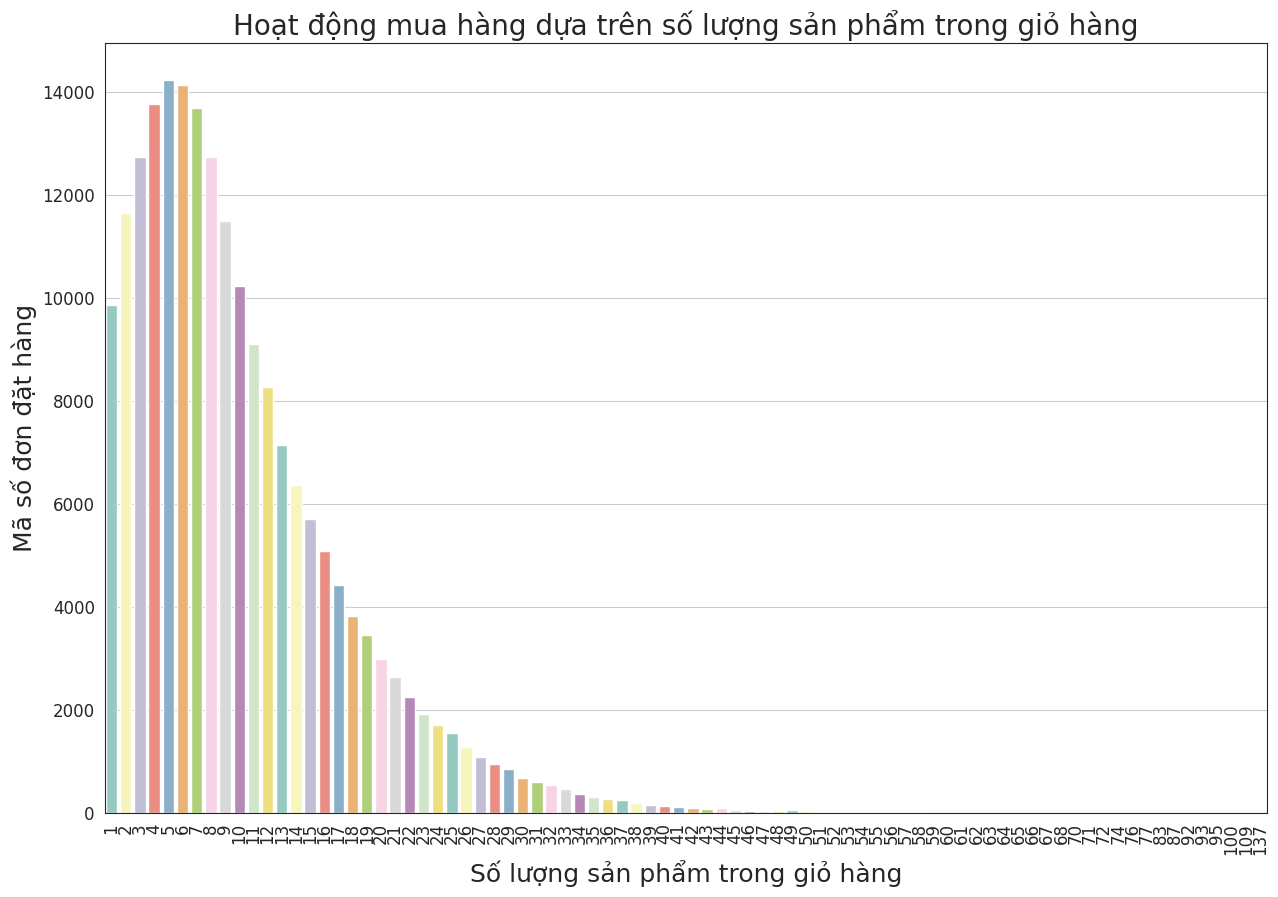

In [ ]:
#Aggregating & grouping values
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
# Nhóm các giá trị "sản phẩm trong giỏ hàng" theo "mã của đơn hàng", sau đó lấy
# giá trị "max" của "sản phẩm trong giỏ hàng" bằng hàm aggregate()
# và trả về thứ tự mới tính theo giá trị từ lớn đến bé theo "sản phẩm trong giỏ hàng"
# từ đó ta sẽ tạo được một nhóm gồm các giá trị "sản phẩm trong giỏ hàng" theo "mã của đơn hàng" từ max->min

grouped = grouped.add_to_cart_order.value_counts()
#Sau khi nhóm các giá trị trên, để trả về số lần xuất hiện của từng giá trị duy nhất
#ta thêm biến đếm các giá trị đó bằng hàm value_counts()

#Visualize purchasing behaviour: Ta sẽ trực quan hóa các dữ liệu này bằng biểu đồ cột
sns.set_style('white')
color = sns.color_palette("Set3")
f, ax = plt.subplots(figsize = (15,10))
sns.barplot(x = grouped.index, y = grouped.values, palette = color) # x biểu diễn giá trị số sản phẩm trong giỏ hàng
                                                                    # y biểu diễn giá trị mã đơn đặt hàng
ax.grid(True, axis='y') # tạo các đường lưới

plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Mã số đơn đặt hàng', fontsize=18)
plt.xlabel('Số lượng sản phẩm trong giỏ hàng', fontsize = 18)
plt.title('Hoạt động mua hàng dựa trên số lượng sản phẩm trong giỏ hàng', fontsize = 20)

plt.show()

### **Ghi chú:** Từ biểu đồ cột trên ta thấy rằng:
- Các khách hàng thường thêm sẵn từ 4-7 sản phẩm vào giỏ hàng của mình.

## **3.3 Aggregating & grouping values to understand purchasing behaviour (Tổng hợp và nhóm các giá trị để hiểu được hoạt động mua hàng)**
- **Mục đích:** hiểu rõ hơn về khách hàng và cách họ tương tác với sản phẩm và dịch vụ, từ đó tối ưu hóa chiến lược kinh doanh và marketing.

In [ ]:
#Aggregating & grouping values
grouped = df.groupby(['product_id','product_name','department'])['reordered'].aggregate('count').reset_index()
# Nhóm các giá trị "sản phẩm được đặt lại" theo "mã của sản phẩm","tên sản phẩm", "danh mục của sản phẩm"
# sau đó, ta dùng hàm aggregate('count') để đếm số lần xuất hiện của chúng và trả về một bảng gồm:
# các cột: "product_id","prodcut_name","department", số lượng "reordered" tương ứng.

grouped = grouped.sort_values(by= "reordered", ascending = False)[:10].reset_index()
# sau khi ta nhóm các giá trị "đặt hàng lại thì ta sẽ sắp xếp các giá trị theo cột "reordered",
# lấy thứ tự giảm dần. Để nắm bắt thông tin quan trọng về hành vi mua hàng của khách hàng,
# ta tập trung vào 10 sản phẩm có tỉ lệ được đặt lại cao nhất thay vì tất cả.


,index,product_id,product_name,department,reordered
0,23,24,fresh fruits,produce,226039
1,82,83,fresh vegetables,produce,212611
2,122,123,packaged vegetables fruits,produce,109596
3,119,120,yogurt,dairy eggs,90751
4,20,21,packaged cheese,dairy eggs,61502
5,83,84,milk,dairy eggs,55150
6,114,115,water seltzer sparkling water,beverages,52564
7,106,107,chips pretzels,snacks,45306
8,90,91,soy lactosefree,dairy eggs,39389
9,111,112,bread,bakery,36381


### **Ghi chú:** Từ bảng trên ta thấy:
- "*Fresh fruit*" và "*fresh vegetables*" thuộc danh mục "*produce*" (nông sản) chiếm hai vị trí hàng đầu về số lần được đặt mua lại. Điều này thể hiện rõ rằng các loại trái cây và rau củ quả tươi thường là những sản phẩm phổ biến và được ưa chuộng.
- Các sản phẩm trong danh mục "*dairy eggs*" ( sản phẩm từ sữa và trứng) cùng các sản phẩm "*snacks*" (đồ ăn nhẹ) chiếm khá nhiều trong bảng trên. Điều này cho thấy sự ưa chuộng và phổ biến của các sản phẩm từ sữa, trứng cũng như các loại đồ ăn nhẹ trong danh sách các sản phẩm cũng được khách hàng ưa chuộng nhiều.

## **3.4 Aggregating & grouping values to visualize & identify the most reordered items (Tổng hợp và nhóm các giá trị để trực quan hóa cũng như định danh sản phẩm được mua lại nhiều nhất)**
- **Mục đích:** nhận diện được những mẫu mực và xu hướng mua hàng chi tiết

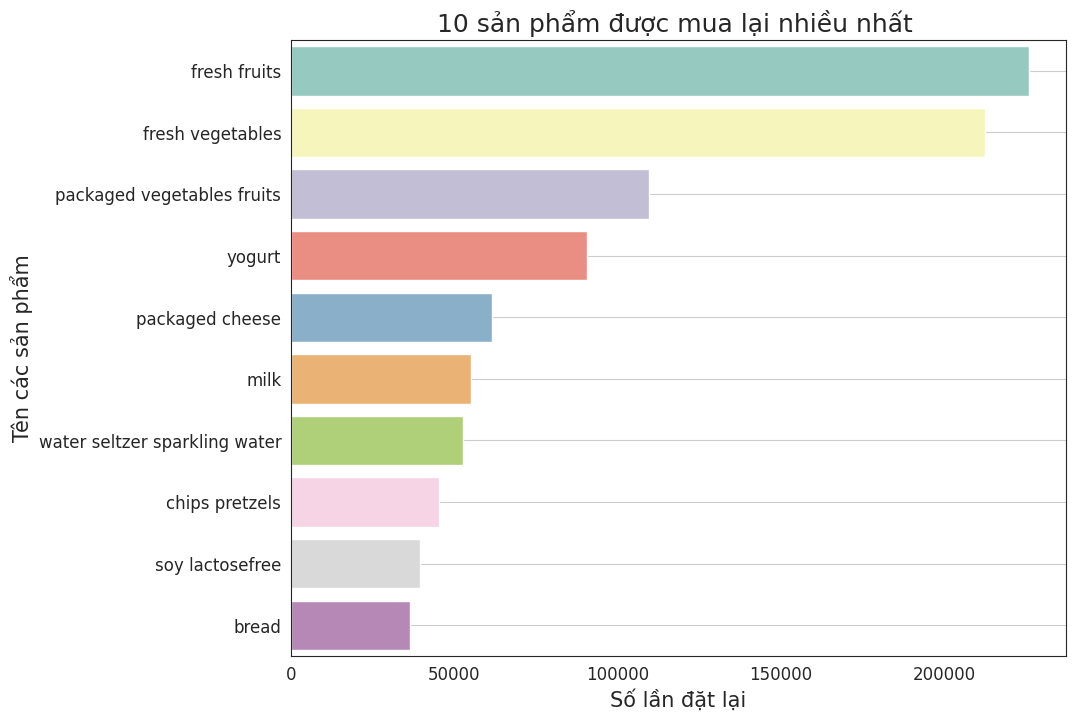

In [ ]:
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)
# Nhóm lại các dữ liệu ta đã lọc ở bảng trên theo "product_name"(Tên sản phẩm)
# và tính tổng giá trị "reordered"(đặt hàng lại), sau đó sắp xếp các giá trị theo thứ tự giảm dần

sns.set_style('white')
f, ax = plt.subplots(figsize = (10,8))
sns.barplot(x = grouped.values, y = grouped.index, ax = ax, palette = 'Set3')
ax.grid(True, axis='y')

plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Tên các sản phẩm', fontsize=15)
plt.xlabel('Số lần đặt lại', fontsize = 15)
plt.title('10 sản phẩm được mua lại nhiều nhất ', fontsize = 18)
plt.show()

### **Ghi chú:** Từ biểu đồ cột trên ta thấy:
5 sản phẩm được khách hàng đặt lại nhiều nhất là:
- fresh fruits: Trái cây tươi
- fresh vegetables: Rau củ quả tươi
- packaged vegetables fruits: Các sản phẩm trái cây, rau củ quả đóng gói
- yogurt
- pakaged cheese: Phô mai đóng gói

## **3.5 Aggregating and grouping value to visualized the most non-reordered products (Tổng hợp và nhóm các dữ liệu để trực quan hóa dữ liệu về các sản phẩm ít được mua nhất)**

In [ ]:
#Aggregating & grouping values
grouped = df.groupby(['product_id','product_name','department'])['reordered'].aggregate('count').reset_index()
##Nhóm các giá trị "sản phẩm được đặt lại" theo "mã của sản phẩm","tên sản phẩm", "danh mục của sản phẩm"
#sau đó, ta dùng hàm aggregate('count') để đếm số lần xuất hiện của chúng và trả về một bảng gồm:
#các cột: "product_id","prodcut_name","department", số lượng "reordered" tương ứng

grouped = grouped.sort_values(by= "reordered", ascending = True)[:10].reset_index()
#sau khi ta nhóm các giá trị "đặt hàng lại" thì ta sẽ sắp xếp các giá trị theo cột "reordered",
#lấy thứ tự giảm dần. Để nắm bắt thông tin quan trọng về hành vi mua hàng của khách hàng,
#ta tập trung vào 10 sản phẩm có tỉ lệ được đặt lại cao nhất thay vì tất cả
grouped

,index,product_id,product_name,department,reordered
0,112,113,frozen juice,frozen,279
1,131,132,beauty,personal care,387
2,81,82,baby accessories,babies,504
3,101,102,baby bath body care,babies,515
4,9,10,kitchen supplies,household,561
5,43,44,eye ear care,personal care,598
6,133,134,specialty wines champagnes,alcohol,614
7,54,55,shave needs,personal care,646
8,108,109,skin care,personal care,654
9,117,118,first aid,personal care,693


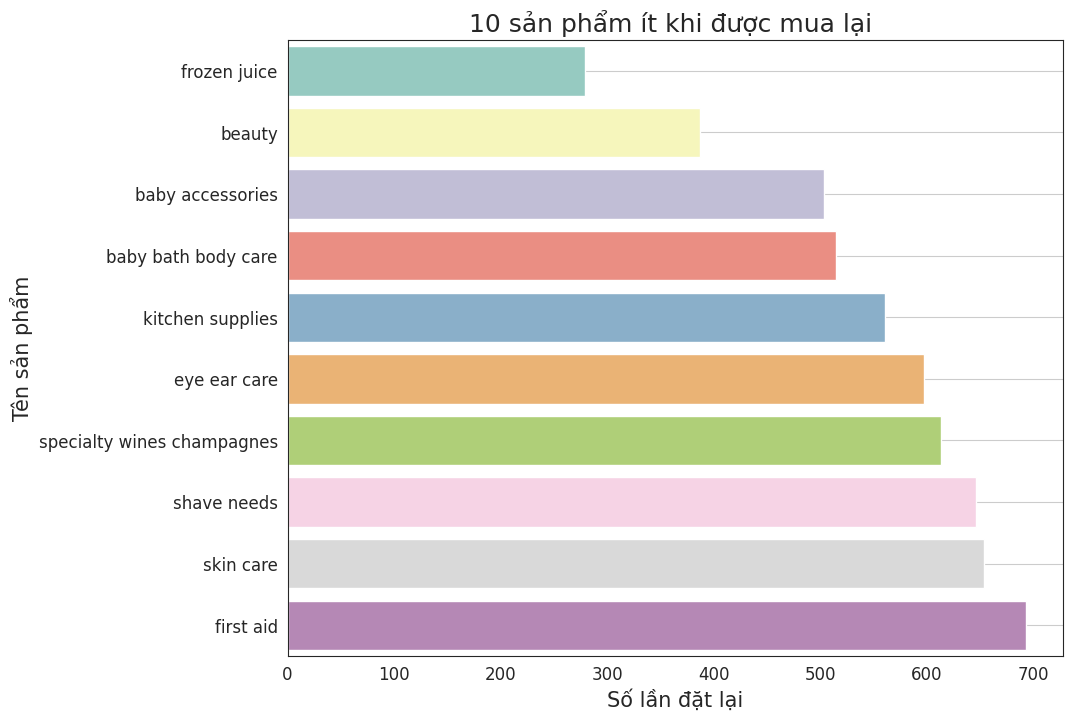

In [ ]:
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=True)
#Nhóm lại các dữ liệu ta đã lọc ở bảng trên theo "product_name"(Tên sản phẩm)
#và tính tổng giá trị "reordered"(đặt hàng lại), sau đó sắp xếp các giá trị theo thứ tự tăng dần

sns.set_style('white')
f, ax = plt.subplots(figsize = (10,8))
sns.barplot(x = grouped.values, y = grouped.index, ax = ax, palette = 'Set3')
ax.grid(True, axis='y')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Tên sản phẩm', fontsize=15)
plt.xlabel('Số lần đặt lại', fontsize = 15)
plt.title('10 sản phẩm ít khi được mua lại ', fontsize = 18)
plt.show()

## **3.6 Aggregating & grouping values to understand product reordered ratio (Tổng hợp và nhóm các giá trị để hiểu tỉ lệ sản phẩm được mua lại)**
- **Mục đích:** Tính toán tỷ lệ của mỗi nhóm "reordered" (số lần được đặt hàng lại) so với tổng số lượng sản phẩm để đánh giá phân phối tỷ lệ các sản phẩm trong mỗi nhóm "reordered".

In [ ]:
grouped = df.groupby("reordered")["product_id"].aggregate('count').reset_index()
#Nhóm dữ liệu "product_id"(mã sản phẩm) theo cột "reordered"
#và đếm giá trị tổng của số mã sản phẩm, sau đó reset_index() để tạo DataFrame mới với chỉ số (index) được làm mới.

grouped['ratio'] = grouped['product_id'].apply(lambda x: x/grouped['product_id'].sum())
#Để tính được tỉ lệ sản phẩm trong nhóm "reordered" ta thêm vào bảng cột "ratio" để lưu trữ số liệu
#Sử dụng phương thức apply để tính tỷ lệ của từng sản phẩm ('product_id')
#bằng cách chia số lượng của sản phẩm đó cho tổng số lượng của tất cả các sản phẩm ('product_id') trong DataFrame 'grouped'

grouped

,reordered,product_id,ratio
0,0,828515,0.410257
1,1,1190986,0.589743


## **3.7 Aggregating & grouping values to visualize reordered ratio (Tổng hợp và nhóm các giá trị để trực quan hóa tỉ lệ sản phẩm được mua lại)**

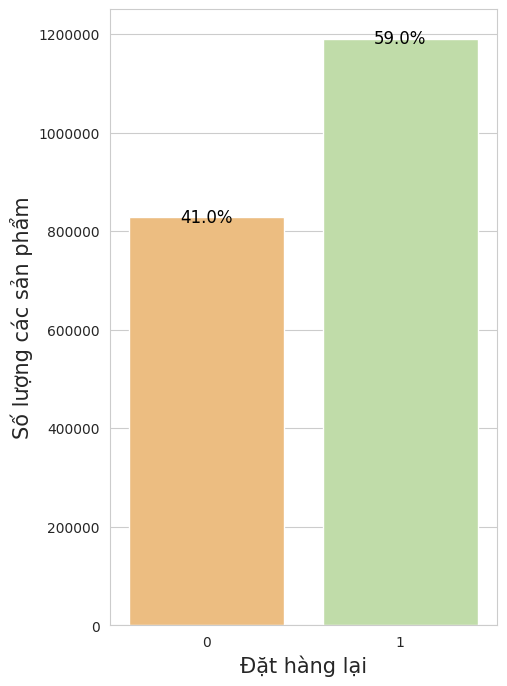

In [ ]:
grouped = grouped.groupby(["reordered"]).sum()["product_id"].sort_values(ascending=True)
#nhóm các dữ liệu trong DataFrame trên theo cột "reordered"
#sau đó chọn cột "product_id" để thực hiện phép tính tổng
#số lượng các sản phẩm trong mỗi nhóm "reordered"
#và trả về thứ tự tăng dần theo tổng số lượng sản phẩm

#Visualize reordered ratio
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize = (5,8))
sns.barplot(x = grouped.index, y = grouped.values, palette = 'Spectral')
ax.grid(True, axis='y')
percent = grouped/ grouped.sum() *100
# Hiển thị phần trăm trên mỗi cột
for d, n in enumerate(grouped.values):
    ax.text(d, n+5, f'{percent.values[d]:.1f}%', ha='center', va='center', fontsize=12, color='black')

plt.xlabel('Đặt hàng lại', fontsize = 15)
plt.ylabel('Số lượng các sản phẩm', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### **Ghi chú**: Từ biểu đồ trên ta thấy có 59% các sản phẩm được đặt hàng lại bởi các khách hàng.

## **3.8 Creating a time based features (Xây dựng dữ liệu thời gian dựa trên các đặc tính)**
- **Mục đích:**: Tìm ra khoảng thời gian đặt hàng nhiều nhất của khách hàng.

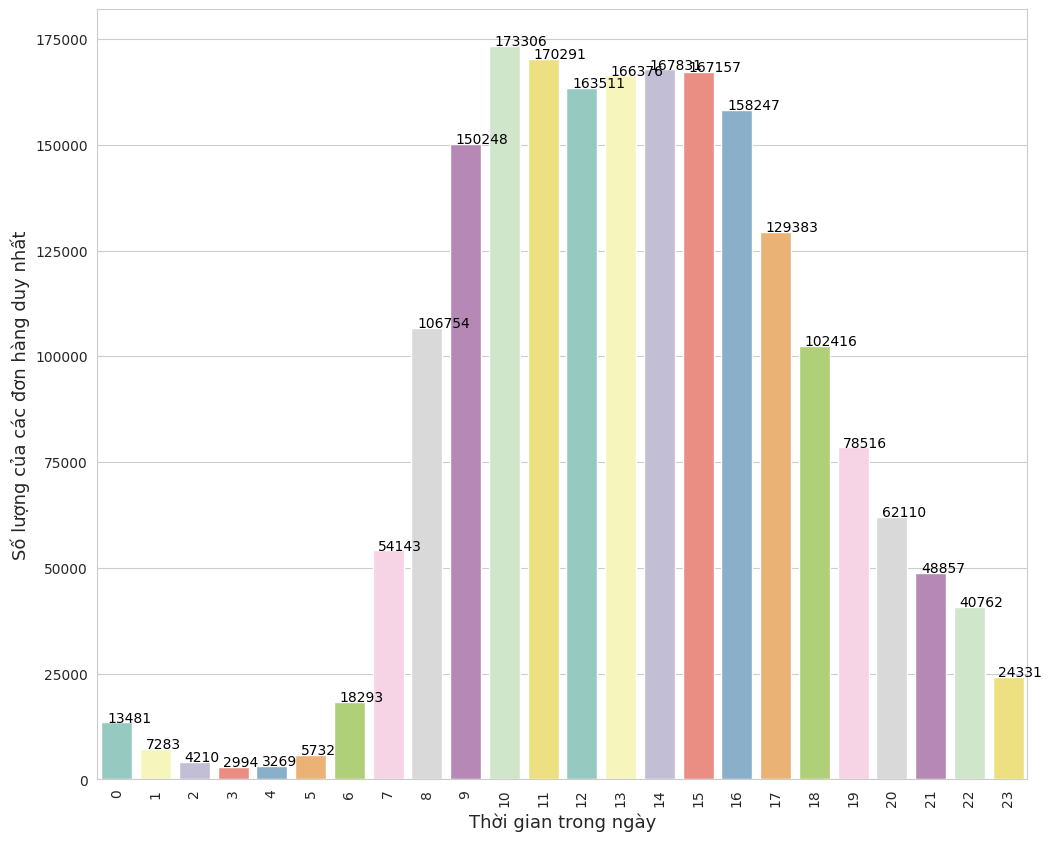

In [ ]:
grouped = df.groupby('order_hour_of_day',as_index=True).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)

f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x = grouped.index, y = grouped.user_id, palette = 'Set3')

plt.ylabel('Số lượng của các đơn hàng duy nhất', fontsize=13)
plt.xlabel('Thời gian trong ngày', fontsize=13)

for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+60, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

### **Ghi chú:** Từ biểu đồ cột trên ta thấy:
- Các khách hàng có xu hướng đặt hàng vào khoảng từ 10-16 giờ (Việt Nam) trong ngày.

## **3.9 Visualizing the order time period based on the hour of the day and the day of the week (Trực quan hóa thời gian đặt hàng dựa vào thời gian trong ngày và trong tuần)**
- **Mục đích:** Có cái nhìn rõ về thời gian mà khách hàng có xu hướng mua hàng để đưa ra các chiến lược marketing, quảng bá vào khoảng thời gian đó.

In [ ]:
def order_time(x):
    return f'{"morning" if x in range(6, 12) else "afternoon" if x in range(12, 18) else "evening" if x in range(18, 23) else "night"}'

df['order_time_period']= df['order_hour_of_day'].apply(order_time)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening


In [ ]:
orders_day_time=df.pivot_table(index='order_dow', columns = 'order_time_period', values ="user_id",aggfunc='count')
# Tạo bảng pivot lấy cột 'order_dow'(ngày trong tuần mà đơn hàng được đặt) làm index
# tức các giá trị mới của bảng này sẽ dựa vào giá trị duy nhất 'order_dow'
# với các cột là  các biến duy nhất của 'order_time_period'(thời điểm đặt hàng trong ngày)
# và đếm số lượng 'user_id' cho mỗi cặp (order_dow, order_time_period).
orders_day_time


order_time_period,afternoon,evening,morning,night
order_dow,,,,
0,196603,60195,123876,11157
1,158970,51825,129591,8850
2,120927,45497,87562,7926
3,112185,41737,77609,7199
4,107170,45359,74338,8017
5,121577,42311,89662,8607
6,135073,45737,90397,9544


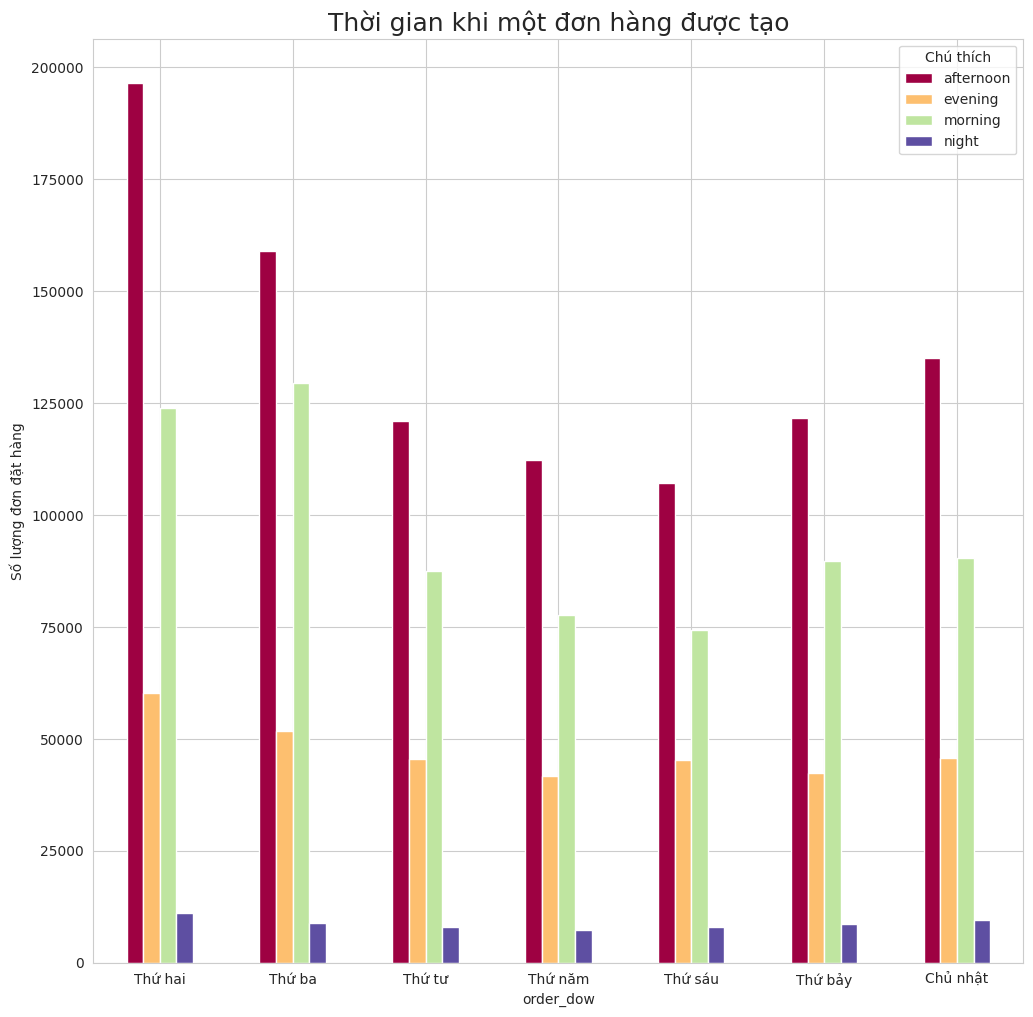

In [ ]:
#Visualize order time period
color = plt.get_cmap('Spectral')
ax = orders_day_time.plot(kind = 'bar', figsize = (12,12), color = color(np.linspace(0,1,len(orders_day_time.columns))))
ax.set_title('Thời gian khi một đơn hàng được tạo', fontsize = 18)
ax.set_xticklabels(['Thứ hai','Thứ ba','Thứ tư','Thứ năm','Thứ sáu','Thứ bảy','Chủ nhật'], rotation = 0)
ax.set_ylabel('Số lượng đơn đặt hàng')
ax.legend(title= "Chú thích", bbox_to_anchor = (1.0,1.0))
plt.show()

### **Ghi chú:** Từ biểu đồ cột trên, ta thấy:
- Số lượng các đơn hàng được tạo ra nhiều nhất trong tất cả các ngày thường rơi vào "*afternoon*"(buổi chiều), từ 12 giờ trưa đến 18g chiều.
- Ngược lại, khoảng thời gian "*evening*"(18g chiều - 23g tối) và "*night*"(23g tối - 6g sáng) lại có số đơn hàng được tạo ra ít hơn.
- Thứ hai, "*afternoon*" là lúc mà các đơn hàng được tạo ra nhiều nhất.
- Ngược lại, từ "Thứ tư" đến "Thứ bảy" là khoảng thời gian mà các khách hàng có xu hướng ít khi đặt hàng.

# 4. MÔ HÌNH HÓA DỮ LIỆU (MODELING).

Trong bối cảnh của bộ dữ liệu Supermarket Consumer Behavior dataset, việc phân cụm có thể được sử dụng để xác định các phân khúc khách hàng riêng biệt có mô hình mua hàng tương ứng. Các doanh nghiệp có thể điều chỉnh chiến lược marketing và cung cấp sản phẩn phù hợp với các phân khúc khách hàng cụ thể bằng cách phân loại khách hàng dựa trên sở thích mua sắm của họ, mang lại các chiến dịch tập trung và thành công hơn. Ở đây chúng ta sẽ sử dụng K-means clustering để mô hình hóa.

## 4.1. K-Means Clusering


Phân cụm K-means là một thuật toán học không giám sát (Unsupervised learning), chia tập dữ liệu thành K cụm. Mỗi cụm dữ liệu được đặc trưng bởi một tâm (centroid). Tâm là điểm đại diện nhất cho một cụm và có giá trị bằng trung bình của toàn bộ các quan sát nằm trong cụm. Chúng ta sẽ dựa vào khoảng cách từ mỗi quan sát tới các tâm để xác định nhãn cho chúng trùng thuộc về tâm gần nhất.

Ban đầu thuật toán sẽ khởi tạo ngẫu nhiên một số lượng xác định trước tâm cụm. Sau đó tiến hành xác định nhãn cho từng điểm dữ liệu và tiếp tục cập nhật lại tâm cụm. Thuật toán sẽ dừng cho tới khi toàn bộ các điểm dữ liệu được phân về đúng cụm hoặc số lượt cập nhật tâm chạm ngưỡng.


![Thuattoan_kmeans.png](attachment:Thuattoan_kmeans.png)

Trên sklearn chúng ta có thể dễ dàng huấn luyện thuật toán k-Means thông qua class KMeans của sklearn.cluster
Do đó, sau đây là các bước phương pháp mà chúng tôi sẽ thực hiện để xây dựng mô hình của mình:
- Tiền xử lý dữ liệu để phân cụm
- Tìm K cụm bằng phương pháp Elbow
- Fit mô hình với số K phù hợp

### Tiền xử lý dữ liệu để phân cụm

In [ ]:
# Chọn features để chạy thuật toán K-means clustering:
# ở đây mình đang cần điều tra các phân khúc khách hàng riêng biệt có mô hình mua hàng tương ứng ntn nên ta chọn
# 2 features là 'user_id' và 'department'
df_crosstab = pd.crosstab(df['user_id'], df['department'])
data = df_crosstab.values


In [ ]:
X_train = pd.DataFrame(data)
X_train

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
1,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
2,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
3,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
4,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105268,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
105269,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
105270,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4
105271,0,0,2,1,1,0,0,7,1,0,...,0,0,0,0,0,0,0,0,10,2


### Tìm K cụm bằng phương pháp Elbow (khủy tay)
Phương pháp Elbow là một cách giúp ta lựa chọn được số lượng các cụm phù hợp dựa vào đồ thị trực quan hoá bằng cách nhìn vào sự suy giảm của hàm biến dạng và lựa chọn ra điểm khuỷ tay (elbow point).


The inertia for : 2 Clusters is: 7543563.188340258
The inertia for : 3 Clusters is: 6284971.902281146
The inertia for : 4 Clusters is: 5731892.334724467
The inertia for : 5 Clusters is: 5281349.892678258
The inertia for : 6 Clusters is: 4996208.343304157
The inertia for : 7 Clusters is: 4763193.064231215
The inertia for : 8 Clusters is: 4586203.516241194
The inertia for : 9 Clusters is: 4435259.975149813
The inertia for : 10 Clusters is: 4308757.429898081
The inertia for : 11 Clusters is: 4188597.9594874727


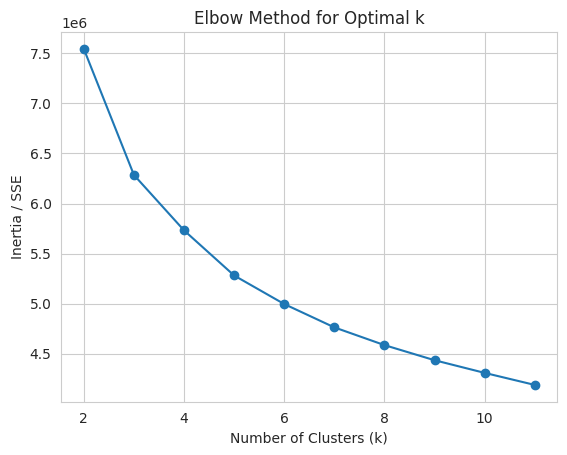

In [ ]:
# Elbow method (Phương pháp khủy tay)
inertia =[]
# inertia là tổng bình phương khoảng cách của các mẫu đến tâm cụm gần nhất của chúng
# (also known as Sum of Squares Errors (or SSE))

k_values = range(2, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state= 42) # random_state xác định việc tạo số ngẫu nhiên để khởi tạo centroid.
                                                    #(different random_state give different mean_squared_error).
    kmeans = kmeans.fit(X_train) # tính toán phân cụm k-means với tập dữ liệu
    inertia.append(kmeans.inertia_)
    print("The inertia for :", k, "Clusters is:", kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia / SSE')
plt.show()

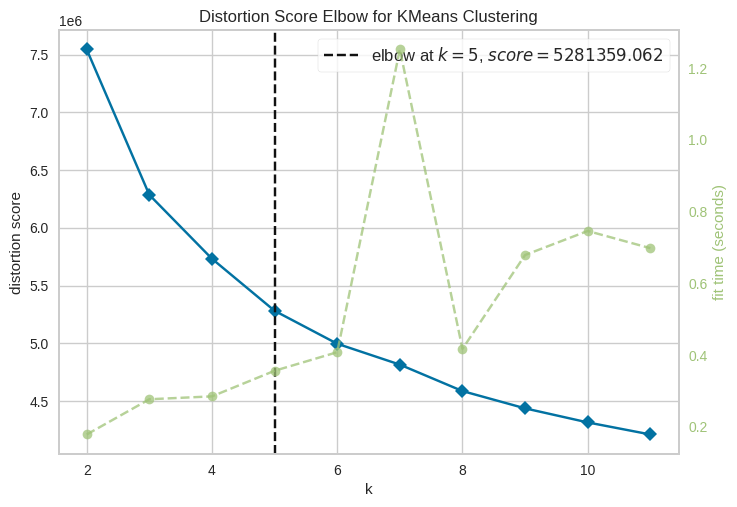

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Cách khác, ta có thể dùng thư viện yellowbrick.cluster để visualize phương pháp Elbow
from yellowbrick.cluster import KElbowVisualizer

#check for number of optimal clusters
model = KMeans(n_init='auto')
visualiser = KElbowVisualizer(model, k=range(2,12))
visualiser.fit(X_train)
visualiser.show()


### Qua 2 cách tìm k dựa vào phương pháp Elbow ở trên, ta có thể chọn k = 5 do ở đó khi ta tăng k lên thì SSE giảm đi ít nhất.

### Fit mô hình với số k phù hợp

In [ ]:
# fit the model with 5 clusters
kmeans_mod = KMeans(n_clusters=5, random_state=48)
kmeans_mod = kmeans_mod.fit(X_train)


In [ ]:
kmeans_labels = kmeans_mod.labels_
print('kmeans label:{}'.format(kmeans_labels)) # Nhãn của từng điểm dữ liệu

# PREDICTIONS FOR NEW DATA
predictions = kmeans_mod.predict(X_train)
print('Prediction: {}'.format(predictions)) # Dự đoán nhãn gần nhất mà mỗi mẫu trong data thuộc về.

kmeans label:[1 2 1 ... 1 2 1]
Prediction: [1 2 1 ... 1 2 1]


In [ ]:
# Đếm số lượng cho từng cụm
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Tạo dataframe cho số lượng của từng cụm
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# hiển thị
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,8132,62488,26579,1957,6117


## 4.2. MODELING :PRINCIPAL COMPONENT ANALYSIS (PCA)¶

Sau khi huấn luyện thuật toán k-Means chúng ta sẽ cần kiểm tra qui luật phân cụm xem chúng đã thực sự hợp lý? Điều này sẽ được thực hiện thông qua biểu đồ phân cụm. Đối với các bộ dữ liệu hai chiều và ba chiều chúng ta có thể dễ dàng biểu diễn chúng trên mặt phẳng hoặc siêu phẳng. Nhưng đối với các bộ dữ liệu nhiều hơn ba chiều thì chúng ta cần áp dụng các phương pháp giảm chiều dữ liệu trước khi đồ thị hoá.

#### Mục đích của giảm chiều dữ liệu:

Những bộ dữ liệu lớn thường tiêu tốn nhiều bộ nhớ lưu trữ và thời gian huấn luyện. Do đó khi đối mặt với những bộ dữ liệu kích thước lớn chúng ta thường tìm cách giảm chiều dữ liệu từ không gian cao chiều (high dimensionality) xuống không gian thấp chiều (low dimensionality) mà vẫn giữ được những đặc trưng chính của dữ liệu nhưng tiết kiệm được chi phí huấn luyện và dự báo.

 Ở đây chúng ta sẽ sử dụng phương pháp Phân Tích Thành Phần Chính (PCA).
 - Bước 1: Sử dụng Principal Component Analysis (PCA) để trực quan hóa và cải thiện kết quả cho 5 cụm
 - Bước 2: Xác định số lượng thành phần "tốt nhất"
 - Bước 3: Chạy lại PCA với số lượng thành phần tốt nhất
 - Bước 4: Cuối cùng chạy lại thuật toán K-means với 5 clusters (cụm) và PCA với 9 components (thành phần)

#### Bước 1: Sử dụng Principal Component Analysis (PCA) để trực quan hóa và cải thiện kết quả cho 5 cụm

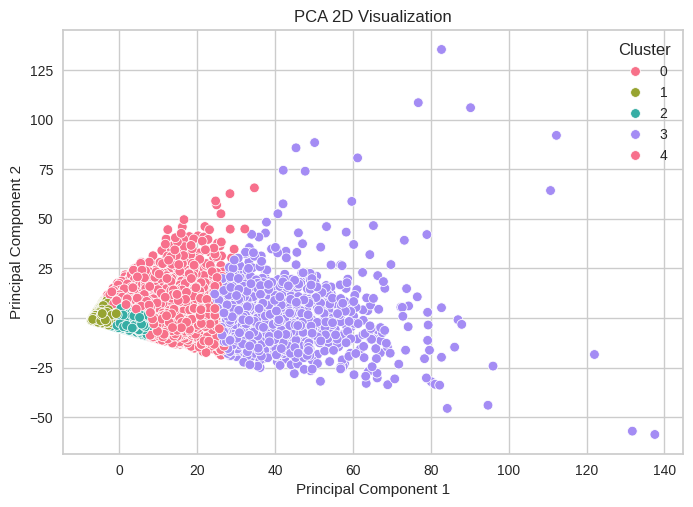

In [ ]:
# import thư viện Để sử dụng PCA trên sklearn
from sklearn.decomposition import PCA

# Sử dụng PCA cho biểu đồ 2 chiều
pca_2d = PCA(n_components=2, random_state=42) # n_components là số lượng chiều mà chúng ta sẽ chiếu trong không gian giảm chiều.
pca_2d_result = pca_2d.fit_transform(X_train)

# Tạo dataframe mới với kết quả PCA ở trên và thêm nhãn dự báo của kmeans vào dataframe đó
df_pca_2d = pd.DataFrame(pca_2d_result, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_2d['Cluster'] = kmeans_labels

# Visualize clusters in 2D using Seaborn
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=df_pca_2d, palette = 'husl')
plt.title('PCA 2D Visualization')
plt.show()

Chúng ta có thể thấy PCA đã giảm chiều dữ liệu xuống 2 chiều.

Khi visualize những lớp trên không gian hai chiều thì chúng ta thấy có sự phân biệt giữa các cụm. Điều đó cho thấy PCA đã bảo toàn được thông tin của dữ liệu đầu vào tốt trên không gian thấp chiều.

#### Bước 2: Xác định số lượng thành phần "tốt nhất"

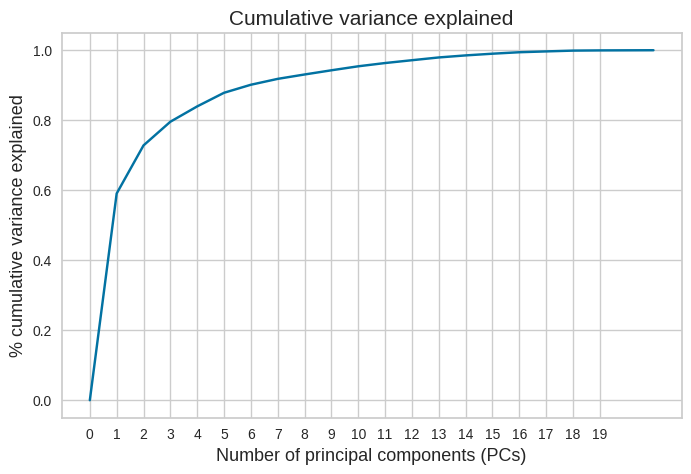

In [ ]:
# Xác định số lượng thành phần tốt nhất
X = X_train
n_components = X.shape[1] # shape() trả về một giá trị tuple cho biết kích thước của đối tượng Python.

# Chạy PCA với tất cả thành phần
pca = PCA(n_components=n_components, random_state = 453)
X_pca = pca.fit_transform(X)

# vẽ biểu đồ phương sai tích lũy được giải thích trên tất cả các thành phần
# bắt đầu phương sai được giải thích ở mức 0
exp_variance = np.insert(pca.explained_variance_ratio_, 0, 0)

# vẽ biểu đồ phương sai
figure = plt.figure(figsize=(8, 5))

plt.plot(np.cumsum(exp_variance)) #cumsum() tính tổng tích lũy của các phần tử mảng trên một trục nhất định.
plt.xticks(range(0,20))
plt.xlabel("Number of principal components (PCs)", size=13)
plt.ylabel("% cumulative variance explained", size=13)
plt.title("Cumulative variance explained", size=15)

plt.show()

**Giải thích: Nhìn vào biểu đồ trên, chúng ta có thể thấy rằng n_components = 9 có thể được sử dụng để biểu thị phương sai 95%**

#### Bước 3: Chạy lại PCA với số lượng thành phần tốt nhất n_components = 9

The inertia for : 2 Clusters is: 6860374.709502077
The inertia for : 3 Clusters is: 5601874.036457364
The inertia for : 4 Clusters is: 5048881.437578786
The inertia for : 5 Clusters is: 4598382.174242314
The inertia for : 6 Clusters is: 4313257.478075428
The inertia for : 7 Clusters is: 4080353.8989069546
The inertia for : 8 Clusters is: 3903827.022319687
The inertia for : 9 Clusters is: 3752359.8561624456
The inertia for : 10 Clusters is: 3623304.212276877
The inertia for : 11 Clusters is: 3505464.6950993044


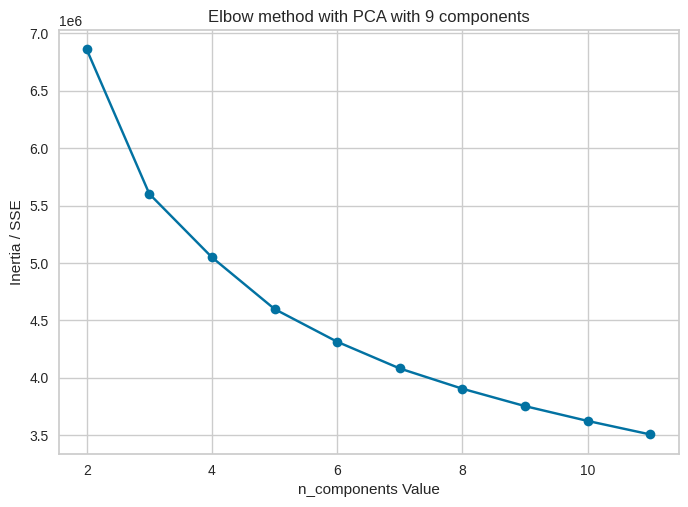

In [ ]:
pca = PCA(n_components=9, random_state = 453)
X_pca = pca.fit_transform(X)

inertia =[] # inertia là tổng bình phương khoảng cách của các mẫu đến tâm cụm gần nhất của chúng
            #(also known as Sum of Squares Errors (or SSE))
k_values = range(2, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state= 42)
    kmeans = kmeans.fit(X_pca) # tính toán phân cụm k-means với pca
    inertia.append(kmeans.inertia_)
    print("The inertia for :", k, "Clusters is:", kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Elbow method with PCA with 9 components')
plt.xlabel('n_components Value')
plt.ylabel('Inertia / SSE')
plt.show()


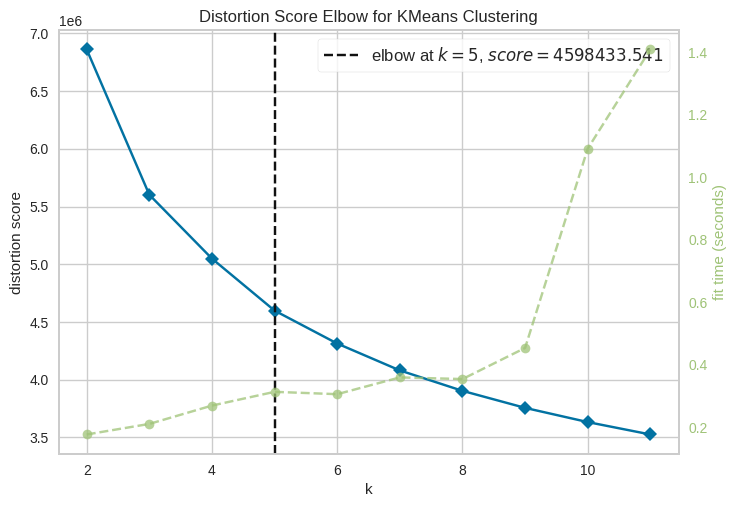

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# cách khác: Sử dụng thư viện yellowbrick.cluster với class KElbowVisualizer
model = KMeans(n_init='auto')
visualiser = KElbowVisualizer(model, k=(2,12))
visualiser.fit(X_pca)
visualiser.show()

**Giải thích: Sau khi chạy lại PCA với n_components = 9, ta thấy giá trị k cụm vẫn là 5 thông qua phương pháp Elbow**

#### Bước 4: Cuối cùng chạy lại thuật toán K-means với 5 clusters (cụm) và PCA với 9 components (thành phần)

In [ ]:
# RUNNING PCA WITH 9 COMPONENTS
pca = PCA(n_components=9, random_state=453)
X_pca = pca.fit(X).transform(X)


data_pca = pd.DataFrame(data=X_pca,
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
# view data frame of PCs
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.980337,0.165983,0.468380,2.020735,-1.472943,-0.620307,-0.179134,0.668329,1.131566
1,1.069204,1.206969,-0.561620,1.170819,-0.278952,-0.784549,-0.440054,-1.066885,-1.158526
2,-1.866324,4.708408,2.203957,-3.451303,-0.752274,-0.731946,-0.215224,1.447606,1.948333
3,7.047133,-3.671748,-2.141517,0.074465,-0.697964,2.320120,-0.609067,-0.537676,1.621686
4,-3.779537,0.499530,-0.060574,-2.156001,-0.181874,2.749115,-0.295326,-2.039319,0.535009


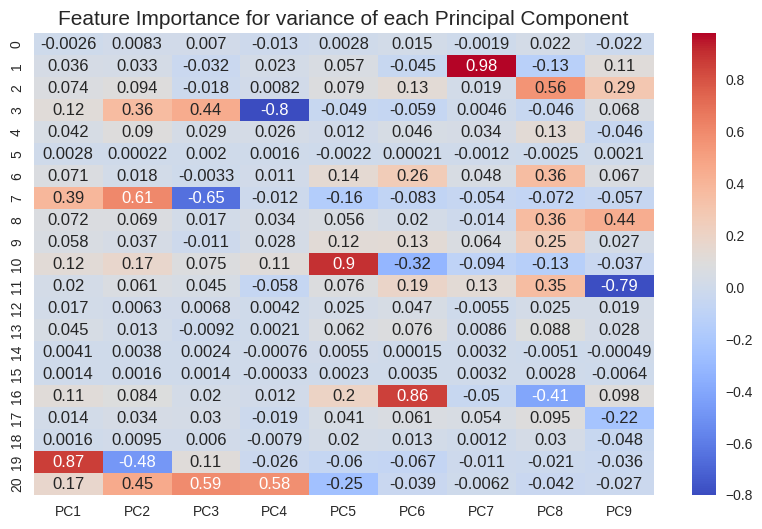

In [ ]:
# Trực quan hóa
figure = plt.figure(figsize=(10, 6))

sns.heatmap(pd.DataFrame(pca.components_).transpose(), #Phương thức transpose() trả về mảng với trục được hoán vị
            annot=True,
            xticklabels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'],
            yticklabels=X_train.iloc[:,:].columns,
            cmap='coolwarm')

plt.title('Feature Importance for variance of each Principal Component', fontsize=15)
plt.show()

#### Giải thích: việc trực quan hóa này (và xếp hạng các tính năng đóng góp cho PCA) sẽ ngay lập tức tiết lộ những tính năng cần tập trung vào ứng với mỗi PCA.

In [ ]:
# RUNNING K-MEANS WITH 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans= kmeans.fit(X_pca)

kmeans_labels = kmeans.labels_

# ADDING THE CLUSTERS BACK TO THE ORIGINAL DATASET
df_crosstab['clusters'] = kmeans_labels

# CREATING A CLUSTER CATERGORY
df_crosstab["Cluster Category"] = "No Data"
df_crosstab["Cluster Category"].loc[df_crosstab["clusters"]==0]="Cluster 1"
df_crosstab["Cluster Category"].loc[df_crosstab["clusters"]==1]="Cluster 2"
df_crosstab["Cluster Category"].loc[df_crosstab["clusters"]==2]="Cluster 3"
df_crosstab["Cluster Category"].loc[df_crosstab["clusters"]==3]="Cluster 4"
df_crosstab["Cluster Category"].loc[df_crosstab["clusters"]==4]="Cluster 5"

df_crosstab.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters,Cluster Category
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,3,3,0,Cluster 1
3,0,0,0,1,0,0,0,5,0,0,...,0,0,0,1,0,0,6,3,3,Cluster 4
7,0,0,1,7,0,0,2,4,3,0,...,1,0,0,0,0,0,2,3,0,Cluster 1
10,0,0,0,0,0,0,0,5,4,0,...,4,0,0,4,0,0,13,0,3,Cluster 4
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,4,0,0,2,0,0,Cluster 1


#### Thống kê tóm tắt và phân phối của từng Cluster

In [ ]:
df_crosstab["Cluster Category"].describe()

count        105273
unique            5
top       Cluster 1
freq          62484
Name: Cluster Category, dtype: object

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'bakery'}>,
        <Axes: title={'center': 'beverages'}>,
        <Axes: title={'center': 'breakfast'}>],
       [<Axes: title={'center': 'bulk'}>,
        <Axes: title={'center': 'canned goods'}>,
        <Axes: title={'center': 'dairy eggs'}>,
        <Axes: title={'center': 'deli'}>,
        <Axes: title={'center': 'dry goods pasta'}>],
       [<Axes: title={'center': 'frozen'}>,
        <Axes: title={'center': 'household'}>,
        <Axes: title={'center': 'international'}>,
        <Axes: title={'center': 'meat seafood'}>,
        <Axes: title={'center': 'missing'}>],
       [<Axes: title={'center': 'other'}>,
        <Axes: title={'center': 'pantry'}>,
        <Axes: title={'center': 'personal care'}>,
        <Axes: title={'center': 'pets'}>,
        <Axes: title={'center': 'produce'}>],
       [<Axes: title={'center': 'snacks'}>,
        <Axes: title={'cente

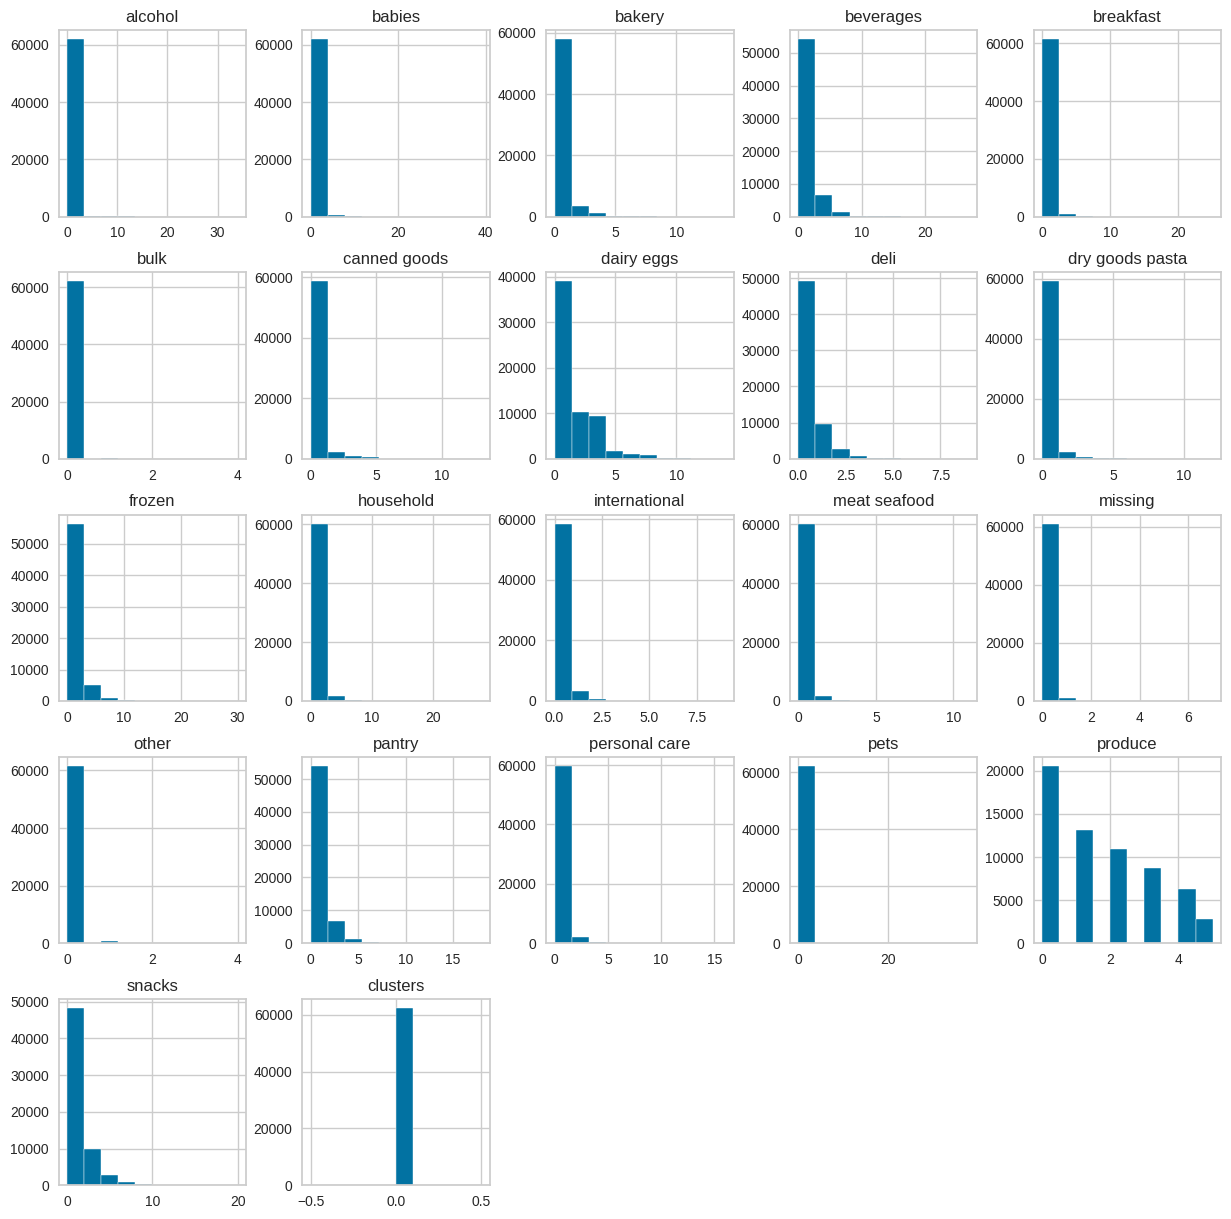

In [ ]:
cluster_1 = df_crosstab[df_crosstab['clusters'] == 0]
cluster_1.hist(figsize=(15,15))

In [ ]:
cluster_1.describe()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters
count,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,...,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.0
mean,0.108348,0.103098,0.366510,1.075203,0.242414,0.007394,0.288042,1.449699,0.302685,0.247183,...,0.076051,0.205205,0.024870,0.015012,0.582469,0.207989,0.051085,1.607035,0.963847,0.0
std,0.744837,0.765201,0.737941,1.679121,0.674174,0.094041,0.748111,1.679556,0.690234,0.666775,...,0.329762,0.530202,0.186245,0.136249,1.069201,0.695600,0.460340,1.522664,1.604020,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.0
max,34.000000,39.000000,14.000000,27.000000,25.000000,4.000000,13.000000,14.000000,9.000000,12.000000,...,9.000000,11.000000,7.000000,4.000000,18.000000,16.000000,38.000000,5.000000,20.000000,0.0


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'bakery'}>,
        <Axes: title={'center': 'beverages'}>,
        <Axes: title={'center': 'breakfast'}>],
       [<Axes: title={'center': 'bulk'}>,
        <Axes: title={'center': 'canned goods'}>,
        <Axes: title={'center': 'dairy eggs'}>,
        <Axes: title={'center': 'deli'}>,
        <Axes: title={'center': 'dry goods pasta'}>],
       [<Axes: title={'center': 'frozen'}>,
        <Axes: title={'center': 'household'}>,
        <Axes: title={'center': 'international'}>,
        <Axes: title={'center': 'meat seafood'}>,
        <Axes: title={'center': 'missing'}>],
       [<Axes: title={'center': 'other'}>,
        <Axes: title={'center': 'pantry'}>,
        <Axes: title={'center': 'personal care'}>,
        <Axes: title={'center': 'pets'}>,
        <Axes: title={'center': 'produce'}>],
       [<Axes: title={'center': 'snacks'}>,
        <Axes: title={'cente

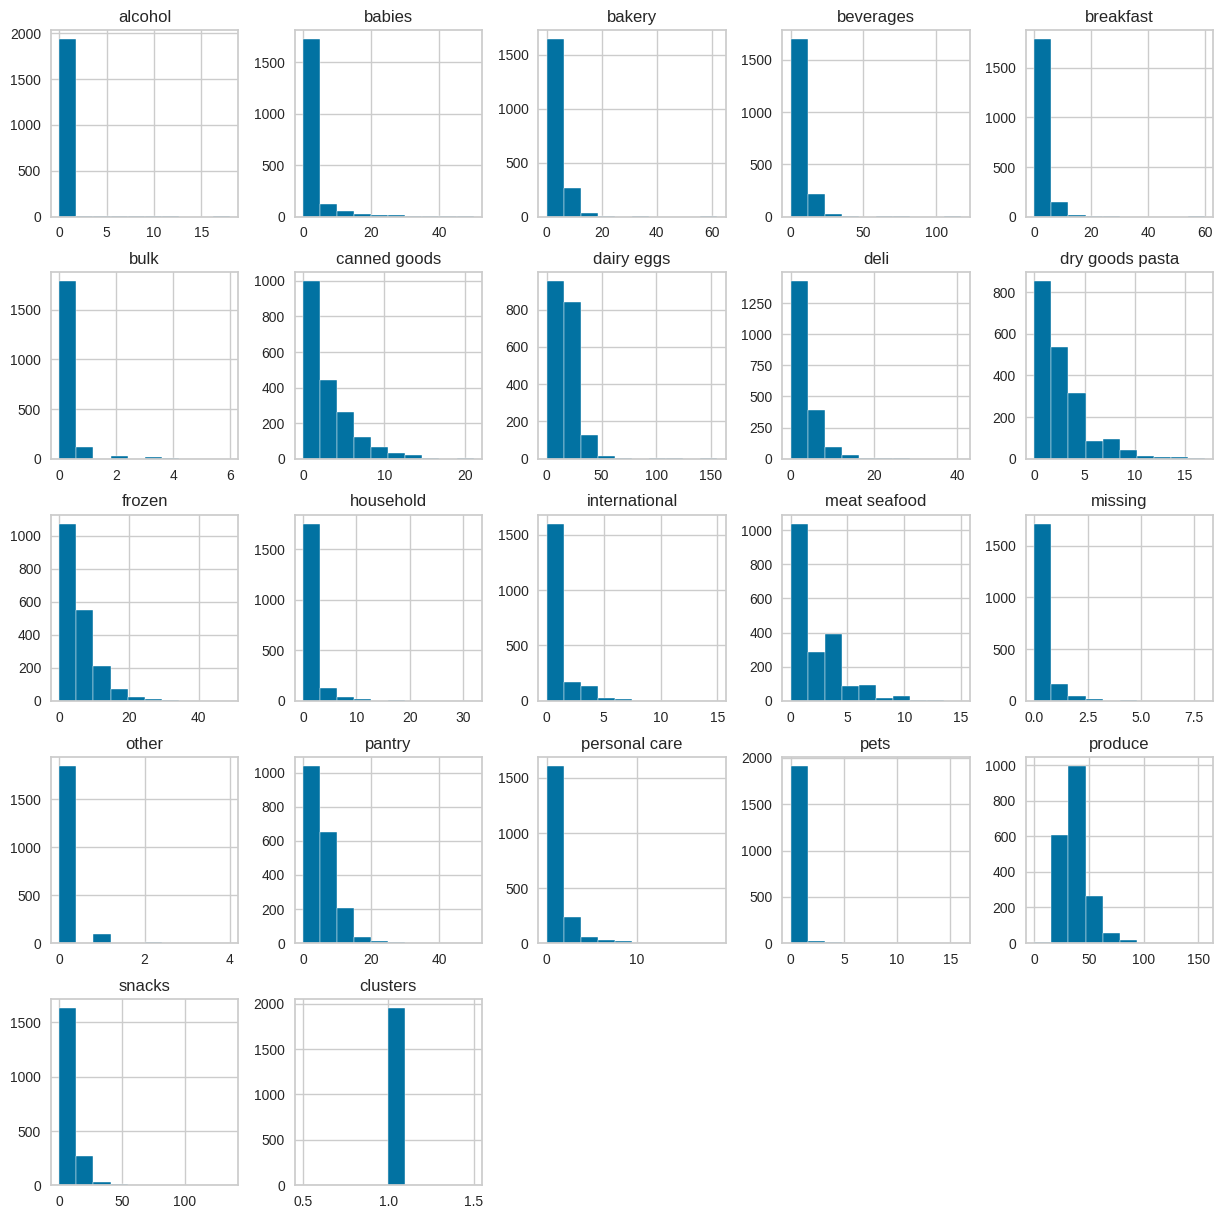

In [ ]:
cluster_2 = df_crosstab[df_crosstab['clusters'] == 1]
cluster_2.hist(figsize=(15,15))

In [ ]:
cluster_2.describe()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters
count,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,...,1953.000000,1953.000000,1953.000000,1953.000000,1953.00000,1953.000000,1953.000000,1953.000000,1953.000000,1953.0
mean,0.060420,1.754224,3.465438,5.537122,1.940092,0.130056,3.157706,17.602151,3.276498,2.592422,...,0.762417,1.950333,0.187916,0.064516,5.06554,0.802355,0.102919,37.777778,7.900666,1.0
std,0.742749,4.722311,3.684671,7.291274,2.869068,0.501517,3.137020,11.908029,3.455713,2.643579,...,1.313892,2.224144,0.630523,0.300163,4.21147,1.602334,0.763644,12.191386,8.554392,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,10.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,30.000000,3.000000,1.0
50%,0.000000,0.000000,3.000000,4.000000,1.000000,0.000000,2.000000,16.000000,2.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,4.00000,0.000000,0.000000,36.000000,6.000000,1.0
75%,0.000000,1.000000,5.000000,7.000000,3.000000,0.000000,5.000000,22.000000,5.000000,4.000000,...,1.000000,3.000000,0.000000,0.000000,7.00000,1.000000,0.000000,43.000000,11.000000,1.0
max,18.000000,50.000000,62.000000,117.000000,60.000000,6.000000,21.000000,156.000000,41.000000,17.000000,...,15.000000,15.000000,8.000000,4.000000,50.00000,19.000000,16.000000,156.000000,136.000000,1.0


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'bakery'}>,
        <Axes: title={'center': 'beverages'}>,
        <Axes: title={'center': 'breakfast'}>],
       [<Axes: title={'center': 'bulk'}>,
        <Axes: title={'center': 'canned goods'}>,
        <Axes: title={'center': 'dairy eggs'}>,
        <Axes: title={'center': 'deli'}>,
        <Axes: title={'center': 'dry goods pasta'}>],
       [<Axes: title={'center': 'frozen'}>,
        <Axes: title={'center': 'household'}>,
        <Axes: title={'center': 'international'}>,
        <Axes: title={'center': 'meat seafood'}>,
        <Axes: title={'center': 'missing'}>],
       [<Axes: title={'center': 'other'}>,
        <Axes: title={'center': 'pantry'}>,
        <Axes: title={'center': 'personal care'}>,
        <Axes: title={'center': 'pets'}>,
        <Axes: title={'center': 'produce'}>],
       [<Axes: title={'center': 'snacks'}>,
        <Axes: title={'cente

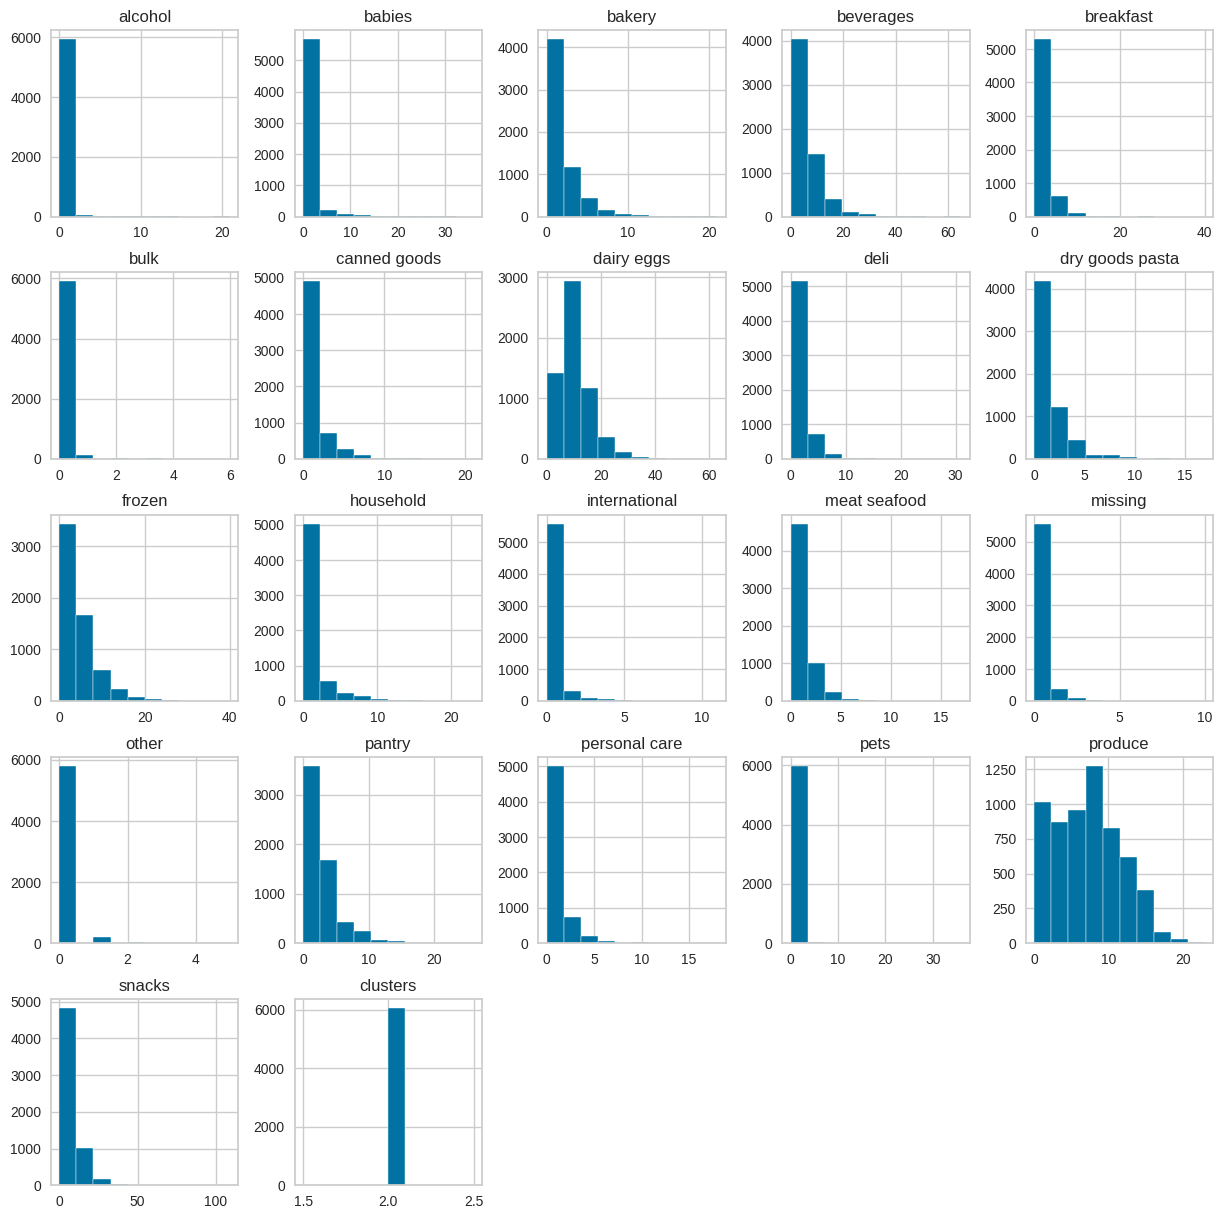

In [ ]:
cluster_3 = df_crosstab[df_crosstab['clusters'] == 2]
cluster_3.hist(figsize=(15,15))

In [ ]:
cluster_3.describe()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters
count,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,...,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.0
mean,0.153770,0.745422,1.988616,5.915361,1.550404,0.037948,1.330474,10.586042,1.643623,1.275037,...,0.359512,0.860254,0.112028,0.050817,2.650718,0.733542,0.172414,7.221086,7.164824,2.0
std,1.023219,2.683226,2.261393,5.930227,2.375336,0.274094,2.041446,6.129278,2.145154,1.891117,...,0.850706,1.399472,0.461189,0.270175,2.769160,1.453610,1.096260,4.420246,6.622623,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,3.000000,2.0
50%,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,1.000000,10.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,7.000000,6.000000,2.0
75%,0.000000,0.000000,3.000000,8.000000,2.000000,0.000000,2.000000,13.000000,2.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,10.000000,9.000000,2.0
max,21.000000,36.000000,21.000000,65.000000,40.000000,6.000000,21.000000,63.000000,31.000000,17.000000,...,11.000000,17.000000,10.000000,5.000000,26.000000,18.000000,36.000000,23.000000,109.000000,2.0


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'bakery'}>,
        <Axes: title={'center': 'beverages'}>,
        <Axes: title={'center': 'breakfast'}>],
       [<Axes: title={'center': 'bulk'}>,
        <Axes: title={'center': 'canned goods'}>,
        <Axes: title={'center': 'dairy eggs'}>,
        <Axes: title={'center': 'deli'}>,
        <Axes: title={'center': 'dry goods pasta'}>],
       [<Axes: title={'center': 'frozen'}>,
        <Axes: title={'center': 'household'}>,
        <Axes: title={'center': 'international'}>,
        <Axes: title={'center': 'meat seafood'}>,
        <Axes: title={'center': 'missing'}>],
       [<Axes: title={'center': 'other'}>,
        <Axes: title={'center': 'pantry'}>,
        <Axes: title={'center': 'personal care'}>,
        <Axes: title={'center': 'pets'}>,
        <Axes: title={'center': 'produce'}>],
       [<Axes: title={'center': 'snacks'}>,
        <Axes: title={'cente

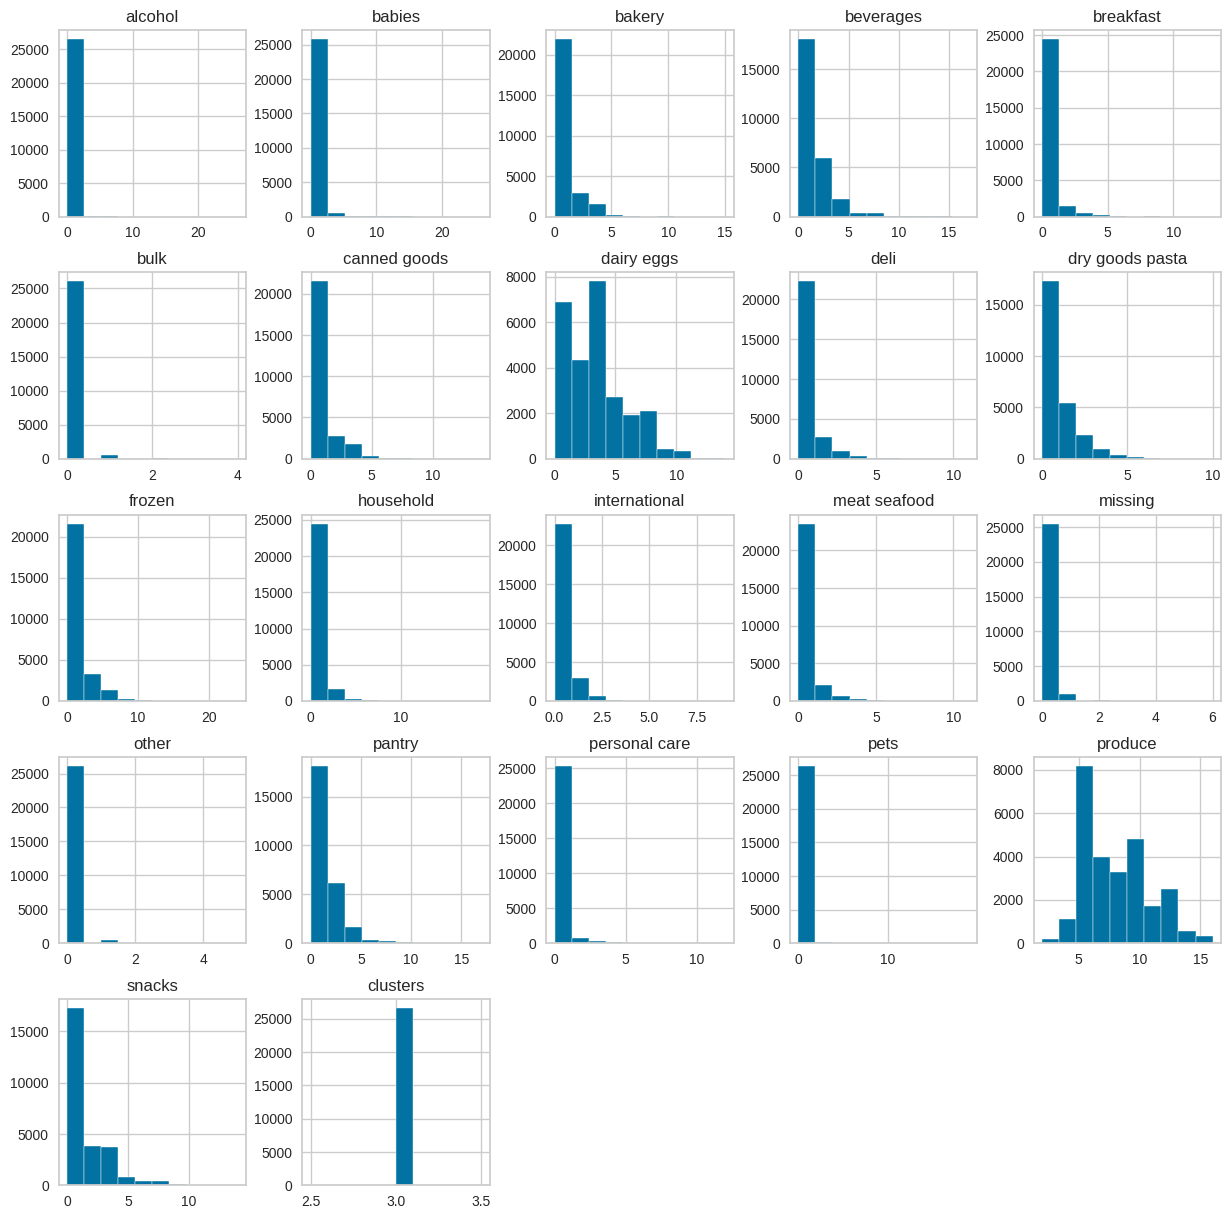

In [ ]:
cluster_4 = df_crosstab[df_crosstab['clusters'] == 3]
cluster_4.hist(figsize=(15,15))

In [ ]:
cluster_4.describe()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters
count,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,...,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,26644.000000,26644.0
mean,0.050668,0.242681,0.724666,1.295188,0.382413,0.025372,0.773570,3.326565,0.683268,0.596645,...,0.194678,0.518578,0.050968,0.020267,1.250638,0.225379,0.038958,7.989228,1.418218,3.0
std,0.495811,1.159126,1.076759,1.719767,0.806985,0.178494,1.238162,2.417078,1.059363,1.026909,...,0.556705,0.871847,0.268082,0.159176,1.604149,0.682861,0.377737,2.653973,1.790356,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.0
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,1.000000,3.0
75%,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,5.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,10.000000,2.000000,3.0
max,26.000000,26.000000,15.000000,17.000000,13.000000,4.000000,14.000000,14.000000,11.000000,10.000000,...,9.000000,11.000000,6.000000,5.000000,17.000000,12.000000,19.000000,16.000000,14.000000,3.0


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'bakery'}>,
        <Axes: title={'center': 'beverages'}>,
        <Axes: title={'center': 'breakfast'}>],
       [<Axes: title={'center': 'bulk'}>,
        <Axes: title={'center': 'canned goods'}>,
        <Axes: title={'center': 'dairy eggs'}>,
        <Axes: title={'center': 'deli'}>,
        <Axes: title={'center': 'dry goods pasta'}>],
       [<Axes: title={'center': 'frozen'}>,
        <Axes: title={'center': 'household'}>,
        <Axes: title={'center': 'international'}>,
        <Axes: title={'center': 'meat seafood'}>,
        <Axes: title={'center': 'missing'}>],
       [<Axes: title={'center': 'other'}>,
        <Axes: title={'center': 'pantry'}>,
        <Axes: title={'center': 'personal care'}>,
        <Axes: title={'center': 'pets'}>,
        <Axes: title={'center': 'produce'}>],
       [<Axes: title={'center': 'snacks'}>,
        <Axes: title={'cente

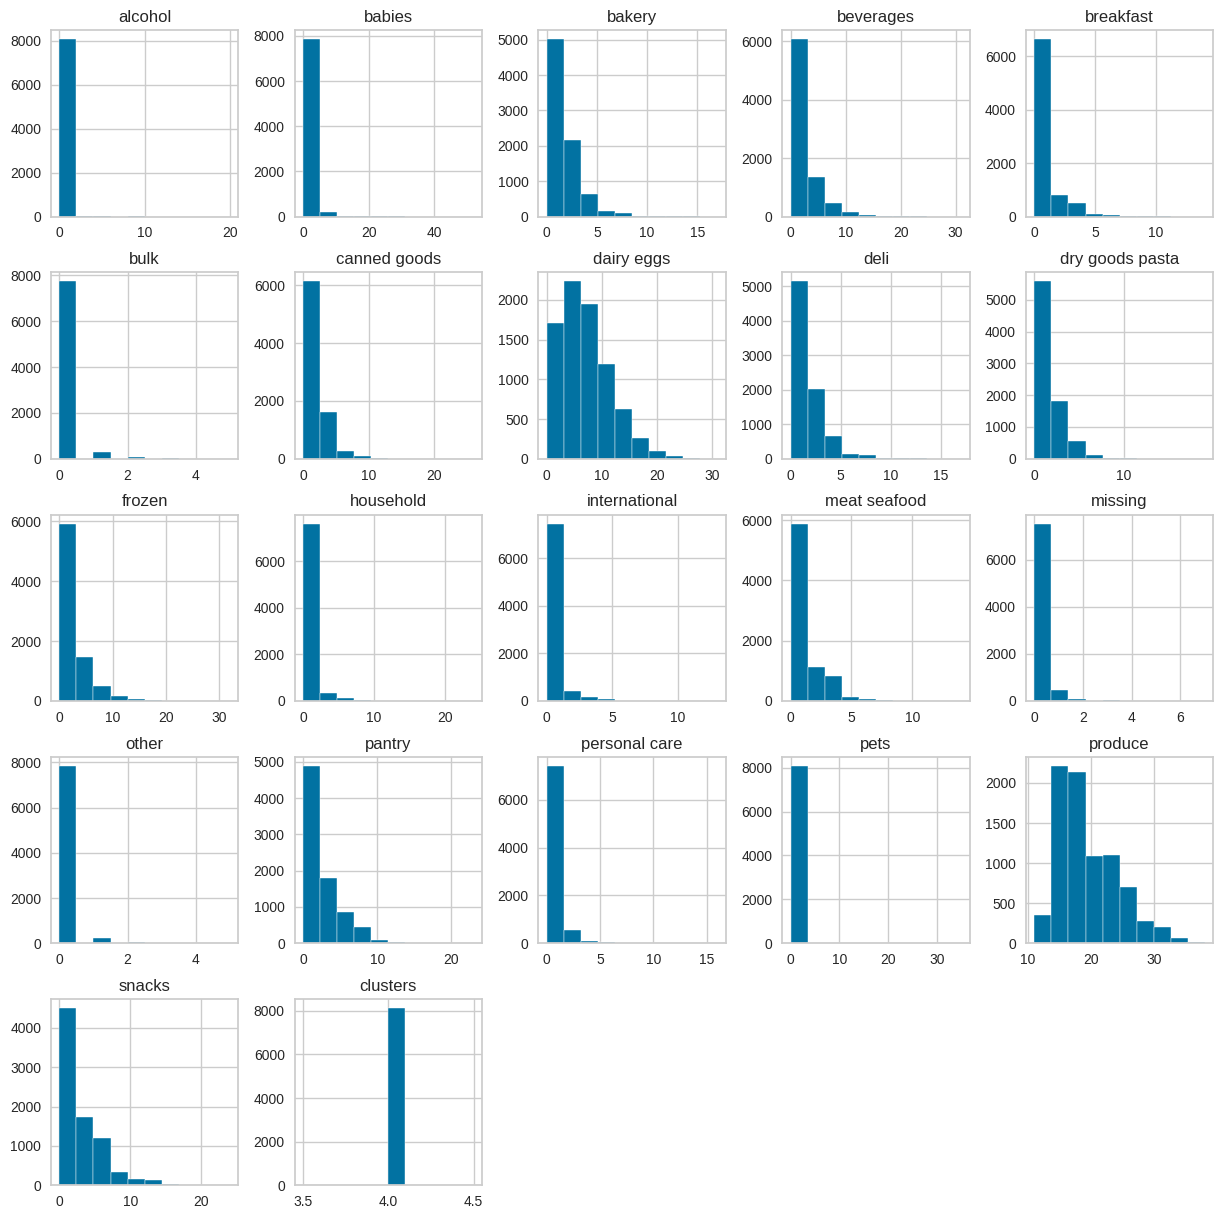

In [ ]:
cluster_5 = df_crosstab[df_crosstab['clusters'] == 4]
cluster_5.hist(figsize=(15,15))

In [ ]:
cluster_5.describe()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters
count,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,...,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.0
mean,0.033083,0.625753,1.470053,2.431066,0.748124,0.062846,1.625015,7.275858,1.438568,1.220145,...,0.385069,1.058787,0.097282,0.040339,2.531792,0.383717,0.066044,19.452712,2.930021,4.0
std,0.411415,2.287733,1.759090,2.857504,1.253392,0.314646,1.991732,4.487131,1.759461,1.605493,...,0.821404,1.442881,0.409609,0.238581,2.481284,0.914742,0.688826,4.602777,3.052053,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,4.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,16.000000,1.000000,4.0
50%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,19.000000,2.000000,4.0
75%,0.000000,0.000000,2.000000,4.000000,1.000000,0.000000,2.000000,10.000000,2.000000,2.000000,...,1.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,22.000000,4.000000,4.0
max,20.000000,52.000000,17.000000,31.000000,14.000000,5.000000,26.000000,31.000000,17.000000,19.000000,...,13.000000,14.000000,7.000000,5.000000,23.000000,16.000000,35.000000,38.000000,24.000000,4.0


# 5. KẾT LUẬN

# **Tổng quan:**

### Đối với các dữ liệu về các sản phẩm:
- Tập trung đẩy mạnh các chiến lược marketing(tiếp thị) cho các sản phẩm được ưa chuộng nhất như là: các sản phẩm nông sản tươi sống và các sản phẩm từ trứng và sữa.
- Đưa ra các ưu đãi như khuyến mãi, mua 1 tặng 1, v.v... cho các sản phẩm ít được chú ý tới và hạn chế tập trung các chiến lược marketing vào các sản phẩm này.

### Đối với các dữ liệu thời gian:
- Căn cứ vào các khoảng thời gian đặt hàng nhiều nhất để từ đó đẩy mạnh truyền thông, quảng cáo trên các trang mạng xã hội, ứng dụng nhằm tối ưu hóa các chiến lược marketing với mục đích tăng hiệu suất quảng cáo và khả năng chuyển đổi.
- Hạn chế đưa ra các quảng cáo vào các thời gian ít người đặt hàng nhằm tiết kiệm .

### Đối với phần Model:

- Sau khi trực quan hóa biểu đồ phân cụm k-means trên không gian 2 chiều bằng phương pháp giảm chiều dữ liệu PCA, ta đã xác định được có 5 phân khúc khách hàng có mô hình mua hàng tương ứng khác nhau. Từ đó các doanh nghiệp có thể điều chỉnh chiến lược marketing và cung cấp dịch vụ phù hợp với từng phân khúc khách hàng cụ thể.

- Với phương pháp PCA với 9 thành phần chính, ta có thể thấy sự ảnh hưởng của từng danh mục lên mỗi thành phần chính (Ví dụ, ta thấy danh mục sản phẩm '7' và '19' ảnh hưởng chủ yếu lên PC1). Từ đó, doanh nghiệp có thể điều tra thêm danh mục quan trọng đối với mỗi thành phần chính (Principal Component), giúp chiến lược marketing tập trung vào những danh mục quan trọng.


# 6. LỜI CẢM ƠN (THANKS).


Chúng em xin gửi lời cảm ơn chân thành đến thầy **Hà Văn Thảo** - giảng viên bộ môn “Python cho Khoa Học Dữ Liệu” trong Khoa Toán Tin, chuyên ngành Khoa Học Dữ Liệu đã trang bị cho em những kiến thức, kỹ năng cơ bản cần có để hoàn thành đề tài nghiên cứu này. Tuy nhiên trong quá trình nghiên cứu đề tài, do kiến thức chuyên ngành còn hạn chế nên em vẫn còn nhiều thiếu sót khi tìm hiểu, đánh giá và trình bày về đề tài. Rất mong nhận được sự quan tâm, góp ý của thầy Thảo bộ môn “Python cho khoa học dữ liệu”.